# Aula 6 - Limpeza de dados

Prof. Tiago Dias

[Linkedin](https://www.linkedin.com/in/diasctiago/) | [Github](https://github.com/diasctiago) | [Blog](https://www.dadosaocubo.com/)

## Conhecendo o pandas

[Documentação pandas](https://pandas.pydata.org/docs/user_guide/index.html)

### Prática com Pandas

In [ ]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
import missingno as msno

#### Base de dados

Base de dados: https://www.kaggle.com/c/titanic/data

In [ ]:
# consultando as base de dados disponíveis
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# carregando dataframe
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [ ]:
titanic.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
# verificando o tipo do dado
type(titanic)

pandas.core.frame.DataFrame

In [ ]:
# Quantidade de linhas e colunas
titanic.shape

(891, 15)

In [ ]:
# tipos de dados das colunas
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
# principais informações dos dados
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# análise estatistica básica das variáveis numéricas
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.describe(include='category')

,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59


#### Dados nulos

In [ ]:
# verificando dados nulos
titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# somando a quantidade de valores nulos por colunas
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# exibindo somente as colunas com dados nulos
titanic.isna().sum()[titanic.isna().sum()>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [ ]:
# verificando o percetual de dados nulos
round(titanic.isna().sum()/len(titanic)*100,2)[titanic.isna().sum()>0]

age            19.87
embarked        0.22
deck           77.22
embark_town     0.22
dtype: float64

In [ ]:
# outra função de verificação de dados nulos
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# outra função de verificação de dados nulos somando por coluna
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

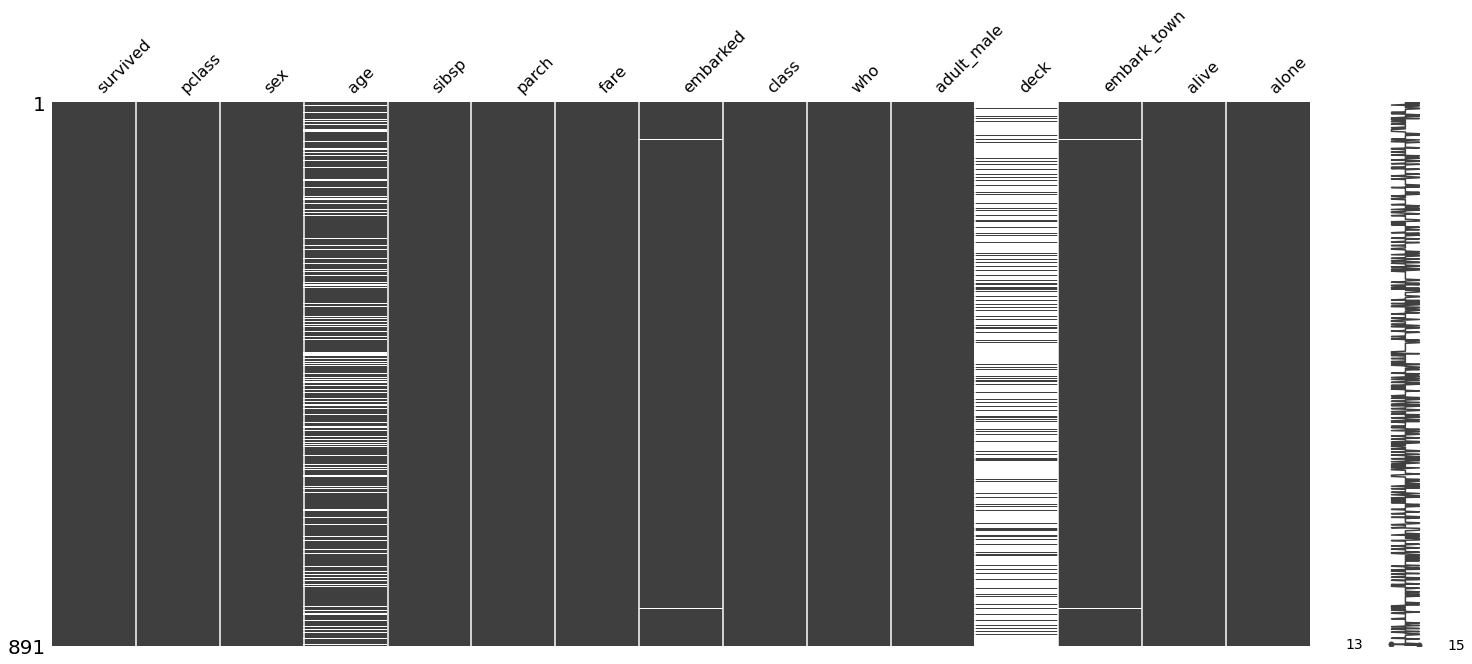

In [ ]:
# análise gráfica dos dados nulos com a biblioteca missingno
msno.matrix(titanic)

#### Dados não nulos

In [ ]:
# verificando dados não nulos
titanic.notna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
# soma dos dados não nulos por coluna
titanic.notna().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [ ]:
# percentual dos dados não nulos por coluna
round(titanic.notna().sum()/titanic.shape[0]*100,2)

survived       100.00
pclass         100.00
sex            100.00
age             80.13
sibsp          100.00
parch          100.00
fare           100.00
embarked        99.78
class          100.00
who            100.00
adult_male     100.00
deck            22.78
embark_town     99.78
alive          100.00
alone          100.00
dtype: float64

In [ ]:
# filtrando apenas as colunas com mais de 80% de dados não nulos
round(titanic.notna().sum()/titanic.shape[0]*100,2)[titanic.notna().sum()/titanic.shape[0]*100>80]

survived       100.00
pclass         100.00
sex            100.00
age             80.13
sibsp          100.00
parch          100.00
fare           100.00
embarked        99.78
class          100.00
who            100.00
adult_male     100.00
embark_town     99.78
alive          100.00
alone          100.00
dtype: float64

In [ ]:
# outra função para verificar dados não nulos
titanic.notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
# soma da outra função para verificar dados não nulos
titanic.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

#### Dados duplicados

In [ ]:
# Verificando dados duplicados
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
# soma dos dados duplicados
titanic.duplicated().sum()

107

In [ ]:
# listar registros duplicados
titanic[titanic.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


#### Deletando dados

In [ ]:
# deletando colunas do dataframe
titanic.drop(columns=['deck','age'])

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# deletando linhas do dataframe
titanic.drop([0,1,2,3,4,5,890,889])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
# deletando linhas do dataframe com valores nulos
titanic.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
# deletar registros nulos baseado em uma coluna específica
titanic.dropna(subset=['age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# deletando linhas duplicadas do dataframe
titanic.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# deletando linhas duplicadas do dataframe baseado em colunas espcíficas
titanic.drop_duplicates(subset=['sex'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


#### Outliers

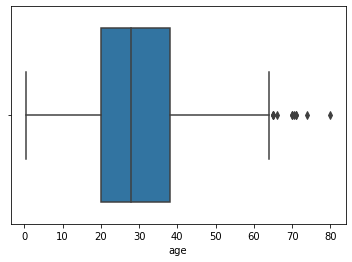

In [ ]:
# observando outliers com boxplot
sns.boxplot(data=titanic, x='age')

In [ ]:
# verificando os percentis das colunas
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
# calculo para identificar outliers do boxplot
# primeiro quartil
q1 = titanic['age'].quantile(0.25)
# terceiro quartil
q3 = titanic['age'].quantile(0.75)
# intervalo interquartil
iqr = q3 - q1
# limite inferior
li = q1 - (iqr*1.5)
# limite superior
ls = q3 + (iqr*1.5)

In [ ]:
# imprimindo os valores
print(f'q1 --> {q1}\nq3 --> {q3}\niqr --> {iqr}\nli --> {li}\nls --> {ls}')

q1 --> 20.125
q3 --> 38.0
iqr --> 17.875
li --> -6.6875
ls --> 64.8125


In [ ]:
# observando os dados com outliers
titanic[titanic['age']>ls]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


In [ ]:
# filtrando os dados sem outliers
titanic[titanic['age']<ls]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Estudo de Caso

Base de dados: https://github.com/mwaskom/seaborn-data/blob/master/taxis.csv

Como analisar uma base de dados de forma rápida, identificando os tipos de variáveis contidos, valores faltantes e possibilidade de valores atípicos?

In [ ]:
taxis = sns.load_dataset('taxis')

In [ ]:
taxis.shape

(6433, 14)

In [ ]:
taxis.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [ ]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [ ]:
taxis.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [ ]:
taxis.isna().sum()[taxis.isna().sum()>0]

payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [ ]:
(round(taxis.isna().sum()/len(taxis)*100,2))[taxis.isna().sum()>0]

payment            0.68
pickup_zone        0.40
dropoff_zone       0.70
pickup_borough     0.40
dropoff_borough    0.70
dtype: float64

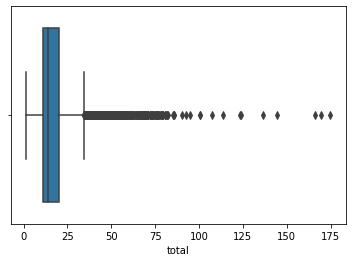

In [ ]:
sns.boxplot(data=taxis , x='total')

Como apagar informações indesejadas de uma tabela?

In [ ]:
taxis.drop(columns=['dropoff_borough','pickup_borough'], inplace=True)

In [ ]:
taxis.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village


In [ ]:
taxis.duplicated().sum()

0

In [ ]:
taxis.dropna(inplace=True)

In [ ]:
taxis.isna().sum()

pickup          0
dropoff         0
passengers      0
distance        0
fare            0
tip             0
tolls           0
total           0
color           0
payment         0
pickup_zone     0
dropoff_zone    0
dtype: int64

### Atividade

**Questão 1 -** Faça o que se pede com a base de dados [mpg](https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv), ao finalizar todas as etapas, crie um repositório público no github e compartilhe o link no [formulário](https://docs.google.com/forms/d/e/1FAIpQLSdoTd43uc-z8YmZNzA5ktWnDpOBrWNkO5Vs2z1xGZDIQV9Afg/viewform?usp=sf_link).

Dicionário dos dados:
* mpg --> consumo do carro
* cylinders --> quantidade de cilindros
* displacement --> deslocamento com um tanque
* horsepower --> potência do carro
* weight --> peso do carro
* acceleration --> aceleração do carro
* model_year --> modelo ano do carro
* origin --> origem do carro
* name --> nome do carro


**a -** carregar base de dados

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**b -** principais caracteristicas dos dados (tipo, tamanho e outras informações relevantes)

In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


**c -** descritivo das variáveis numéricas

In [ ]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**d -** soma e percentual dos dados faltantes

In [ ]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
mpg.isna().sum()[mpg.isna().sum()>0]

horsepower    6
dtype: int64

In [ ]:
mpg.isna().sum()/len(mpg)*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

**e -** soma e percentual dos dados não nulos

In [ ]:
mpg.notna().sum()

mpg             398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model_year      398
origin          398
name            398
dtype: int64

In [ ]:
round(mpg.notna().sum()/len(mpg)*100,2)

mpg             100.00
cylinders       100.00
displacement    100.00
horsepower       98.49
weight          100.00
acceleration    100.00
model_year      100.00
origin          100.00
name            100.00
dtype: float64

**f -** verificar valores outliers na colunas de potência (horsepower) e aceleração(acceleration).
*   exibir graficamente
*   apresentar os valores dos limites inferiores e superiores



In [ ]:
def lils (col):
  q1 = mpg[col].quantile(0.25)
  q3 = mpg[col].quantile(0.75)
  iqr = q3 - q1
  li = q1 - (iqr*1.5)
  ls = q3 + (iqr*1.5)
  return q1,q3,iqr,li,ls

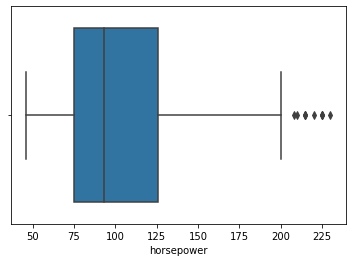

In [ ]:
sns.boxplot(data=mpg , x='horsepower')

In [ ]:
q1,q3,iqr,li,ls = lils('horsepower')

In [ ]:
q1,q3,iqr,li,ls

(75.0, 126.0, 51.0, -1.5, 202.5)

In [ ]:
mpg[mpg['horsepower']>ls]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,usa,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix


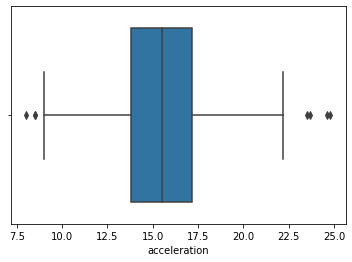

In [ ]:
sns.boxplot(data=mpg , x='acceleration')

In [ ]:
q1,q3,iqr,li,ls = lils('acceleration')

In [ ]:
q1,q3,iqr,li,ls

(13.825000000000001, 17.175, 3.3499999999999996, 8.8, 22.2)

In [ ]:
mpg[mpg['acceleration']<li]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340


In [ ]:
mpg[mpg['acceleration']>ls]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
59,23.0,4,97.0,54.0,2254,23.5,72,europe,volkswagen type 3
299,27.2,4,141.0,71.0,3190,24.8,79,europe,peugeot 504
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup


**g -** deletar as linhas com valores nulos

In [ ]:
mpg.dropna(inplace=True)

In [ ]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

**h -** deletar a coluna ano modelo (model_year)

In [ ]:
mpg.drop(columns=['model_year'], inplace=True)

**i -** deletar carros de origem japonesa

In [ ]:
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
0,18.0,8,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,usa,buick skylark 320


In [ ]:
mpg['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [ ]:
mpg[mpg['origin'] != 'japan']

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
0,18.0,8,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,usa,ford torino
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,usa,ford ranger


In [ ]:
mpg2 = mpg.query('origin != "japan"')

In [ ]:
len(mpg2), len(mpg)

(313, 392)

**j -** converta as colunas para os melhores dtypes possíveis de acordo com a biblioteca pandas

In [ ]:
mpg2.dtypes

mpg             Float64
cylinders         Int64
displacement    Float64
horsepower        Int64
weight            Int64
acceleration    Float64
origin           string
name             string
dtype: object

In [ ]:
mpg2.convert_dtypes().dtypes

mpg             Float64
cylinders         Int64
displacement    Float64
horsepower        Int64
weight            Int64
acceleration    Float64
origin           string
name             string
dtype: object

In [ ]:
mpg2 = mpg2.convert_dtypes()

**l -** verificar a quantidade de dados duplicados no dataframe

In [ ]:
mpg2.duplicated().sum()

0

**m -** comparar os tamanhos do dataframe original e o modificado

In [ ]:
mpg = sns.load_dataset('mpg')

In [ ]:
mpg.shape

(398, 9)

In [ ]:
mpg2.shape

(313, 8)

In [ ]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [ ]:
mpg2.dtypes

mpg             Float64
cylinders         Int64
displacement    Float64
horsepower        Int64
weight            Int64
acceleration    Float64
origin           string
name             string
dtype: object

**n -** gravar a nova base de dados após a limpeza

In [ ]:
mpg2.to_csv('mpg_trat.csv', index=False)